# 数据读入与统计特征处理

In [52]:
MORE_DETAIL = False

# record_interval = "0.010000"      "0.100000"      "1.000000"
record_interval = "0.005000"

node = 23
lamTimes=1
port=55591

parDir =f"/home/hesy/projects/ns3/ns3-test/data/lp_73god_view/{record_interval}_lamTimes{lamTimes}_port{port}/"
# parDir =f"/home/hesy/projects/ns3/ns3-test/data/lp_god_view/{record_interval}_lamTimes{lamTimes}_port{5561}/"
util_file =f"traces/util_{record_interval}.txt"
# avrRTT_file =f"traces/avrRTT_{record_interval}_{lam}.txt"
# deviceQueue_file =f"traces/deviceQueue_{record_interval}.txt"

file_list = [util_file] 
titles = ["link-tilization"]

In [43]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

datas_ospf = [None]*len(file_list) # datas[i]包含 ( node*(node-1) , timestep ) 维度的数据 ( i是观测属性index，比如util )
# 从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[i] 包含["0.5": ... ; "0.9": ...] 的DataFrame
describes_ospf =[] # 每一行是一个时间点

attrs = [\
         '0.5',\
         '0.9',\
         'max']

for (i, file) in enumerate(file_list):
    datas_ospf[i] = pd.DataFrame(np.loadtxt(parDir+file))  # datas[0],也就是util,行是时间步，列是bi-link
    if file == util_file:
        datas_ospf[i]*=100
    # print(f"loading {parDir+file}")
    # print(f"\tdatas[i].shape is {datas_ospf[i].shape}")
    # print(f"\tdescribes[i].shape is {datas_ospf[i].transpose().quantile(0.9).shape}") # 默认是都是以第一个axis为一个unit进行统计  所以要transpose一下
    describes_ospf.append(pd.DataFrame({\
                                        "0.5":datas_ospf[i].transpose().quantile(0.5),\
                                        "0.9":datas_ospf[i].transpose().quantile(0.9),\
                                        "max":datas_ospf[i].transpose().quantile(1)\
                                       }))
    
import copy
CUT_OFF = 6000 # max timestep in pic

origin_describe_ospf = copy.deepcopy(describes_ospf)
describes_cut_ospf = [ origin_data.iloc[:CUT_OFF,:] for origin_data in  origin_describe_ospf ]

## 读入其他数据方便后续比较

In [44]:
port_rl = 6610
parDir_rl =f"/home/hesy/projects/mars_ns3/data/rl_deci1/{record_interval}_lamTimes{lamTimes}_port{port_rl}/"
util_file_rl =f"traces/util_{record_interval}.txt"

util_file_rl
file_list_rl = [util_file_rl] 

datas_rl = [None]*len(file_list_rl) # datas[i]包含 ( node*(node-1) , timestep ) 维度的数据 ( i是观测属性index，比如util )
# 从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[i] 包含["0.5": ... ; "0.9": ...] 的DataFrame
describes_rl =[] # 每一行是一个时间点

for (i, file) in enumerate(file_list_rl):
    datas_rl[i] = pd.DataFrame(np.loadtxt(parDir_rl+file))  # 行是node*(node-1)那么多的数据，列是时间轴
    if file == util_file_rl:
        datas_rl[i]*=100
    # print(f"\tdatas[i].shape is {datas_rl[i].shape}")
    # print(f"\tdescribes[i].shape is {datas_rl[i].transpose().quantile(0.9).shape}") # 默认是都是以第一个axis为一个unit进行统计  所以要transpose一下
    describes_rl.append(pd.DataFrame({\
                                      "0.5":datas_rl[i].transpose().quantile(0.5),\
                                      "0.9":datas_rl[i].transpose().quantile(0.9),\
                                      "max":datas_rl[i].transpose().quantile(1)}\
                                    ))

import copy
origin_describe_rl = copy.deepcopy(describes_rl)
describes_cut_rl = [ origin_data_rl.iloc[:CUT_OFF,:] for origin_data_rl in  origin_describe_rl ]

lp

In [46]:
port_ben = 6610
parDir_ben =f"/home/hesy/projects/mars_ns3/data/lp_73ben/{record_interval}_lamTimes{lamTimes}_port{port_ben}/"
util_file_ben =f"traces/util_{record_interval}.txt"

file_list_ben = [util_file_ben] 

datas_ben = [None]*len(file_list_ben) # datas[i]包含 ( node*(node-1) , timestep ) 维度的数据 ( i是观测属性index，比如util )
# 从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[i] 包含["0.5": ... ; "0.9": ...] 的DataFrame
describes_ben =[] # 每一行是一个时间点

for (i, file) in enumerate(file_list_ben):
    # print(f"loading {parDir_ben+file}")
    datas_ben[i] = pd.DataFrame(np.loadtxt(parDir_ben+file))  # 行是node*(node-1)那么多的数据，列是时间轴
    if file == util_file_ben:
        datas_ben[i]*=100
    # print(f"\tdatas[i].shape is {datas_ben[i].shape}")
    # print(f"\tdescribes[i].shape is {datas_ben[i].transpose().quantile(0.9).shape}") # 默认是都是以第一个axis为一个unit进行统计  所以要transpose一下
    describes_ben.append(pd.DataFrame({\
                                       "0.5":datas_ben[i].transpose().quantile(0.5),\
                                       "0.9":datas_ben[i].transpose().quantile(0.9),\
                                       "max":datas_ben[i].transpose().quantile(1)\
                                      }))
    
import copy
origin_describe_ben = copy.deepcopy(describes_ben)
describes_cut_ben = [ origin_data_ben.iloc[:CUT_OFF,:] for origin_data_ben in  origin_describe_ben ]

## 统计特征图绘制

Text(0.5, 1.0, '23_recordInterval0.005000_lamTimes1_link-tilization')

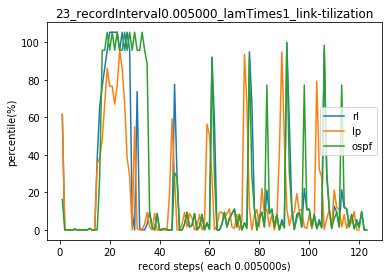

In [53]:
for datas in [\
              describes_cut_rl,\
              describes_cut_ben,\
              describes_cut_ospf\
             ]:
    for (i,data) in enumerate(datas):
            plt.plot(range(1,len(data[attrs[1]])+1),data['max'],'-')

plt.xlabel(f'record steps( each {record_interval}s)')
plt.ylabel('percentile(%)')
plt.legend([ 
            'rl',\
            'lp',\
            'ospf'\
           ])
fileName= f"{node}_recordInterval{record_interval}_lamTimes{lamTimes}_{titles[i]}"
plt.title(fileName)

## 平滑到75ms后绘制统计特征图

In [7]:
from more_itertools import chunked
# describes_cut[0]是util的数据

describes_smooth_rl= [ np.array(x).sum(axis=0)/len(x) for x in chunked(describes_cut_rl[0].values, 75//5)]
describes_smooth_rl=pd.DataFrame(describes_smooth_rl,columns= attrs)

describes_smooth_ben= [ np.array(x).sum(axis=0)/len(x) for x in chunked(describes_cut_ben[0].values, 75//5)]
describes_smooth_ben=pd.DataFrame(describes_smooth_ben,columns= attrs)

describes_smooth_ospf= [ np.array(x).sum(axis=0)/len(x) for x in chunked(describes_cut_ospf[0].values, 75//5)]
describes_smooth_ospf=pd.DataFrame(describes_smooth_ospf,columns= attrs)

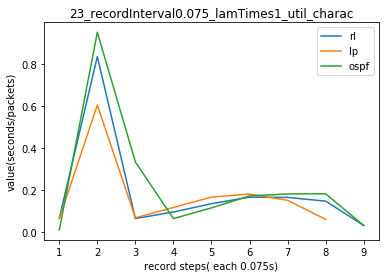

In [8]:
for data in [describes_smooth_rl,describes_smooth_ben,describes_smooth_ospf]:
    plt.plot(range(1,len(data['max'])+1),data['max'],'-')

plt.legend(['rl','lp','ospf'])

record_interval = float(record_interval)*15
plt.xlabel(f'record steps( each {record_interval}s)')
plt.ylabel('value(seconds/packets)')
fileName= f"{node}_recordInterval{record_interval}_lamTimes{lamTimes}_{titles[i]}"
fileName+=f"_charac"
plt.title(fileName)
plt.show()

## 绘制各链路 链路利用率情况

In [15]:
util_data_rl = datas_rl[0]
util_data_ben = datas_ben[0]
util_data_ospf = datas_ospf[0]

### 查看所有链路

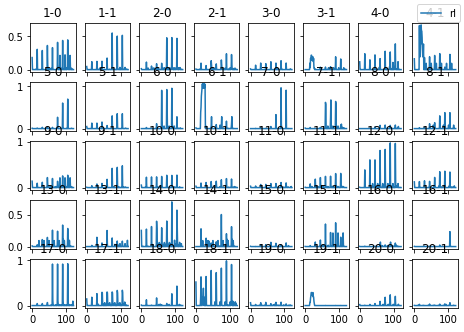

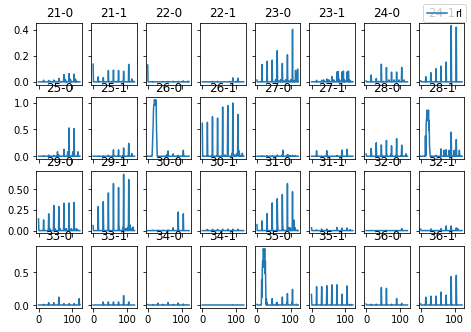

In [20]:
fig,ax=plt.subplots(5,8,sharex='col',sharey='row')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)
for linkIdx in range(40):
    img_idx = linkIdx-0
    link_util_rl = util_data_rl.iloc[:,linkIdx]
    # link_util_ben = util_data_ben.iloc[:,linkIdx]
    # link_util_ospf = util_data_ospf.iloc[:,linkIdx]
    ax[img_idx//8,img_idx%8].plot(range(len(link_util_rl)),link_util_rl)
    # ax[linkIdx//8,linkIdx%8].plot(range(len(link_util_ben)),link_util_ben)
    # ax[linkIdx//8,linkIdx%8].plot(range(len(link_util_ospf)),link_util_ospf)
    ax[img_idx//8,img_idx%8].set_title(f"{linkIdx//2 +1}-{linkIdx%2}")

fig.legend([\
            'rl',\
            # 'lp',\
            # 'ospf'\
           ])


### ======================================================
fig2,ax2=plt.subplots(4,8,sharex='col',sharey='row')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)
for linkIdx in range(40,72):
    img_idx = linkIdx-40
    link_util_rl = util_data_rl.iloc[:,linkIdx]
    # link_util_ben = util_data_ben.iloc[:,linkIdx]
    # link_util_ospf = util_data_ospf.iloc[:,linkIdx]
    ax2[img_idx//8,img_idx%8].plot(range(len(link_util_rl)),link_util_rl)
    # ax[linkIdx//8,linkIdx%8].plot(range(len(link_util_ben)),link_util_ben)
    # ax[linkIdx//8,linkIdx%8].plot(range(len(link_util_ospf)),link_util_ospf)
    ax2[img_idx//8,img_idx%8].set_title(f"{linkIdx//2 +1}-{linkIdx%2}")

fig2.legend([\
            'rl',\
            # 'lp',\
            # 'ospf'\
           ])

### 查看制造burst的链路

In [ ]:
4-1， 6-1 ， 18-1

Text(0.5, 0.98, '80-130ms burst')

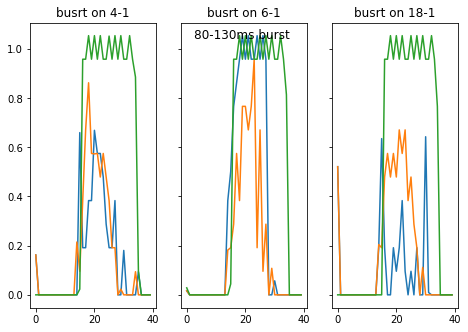

In [33]:
links = [7,11,35]
link_name = ['4-1', '6-1','18-1']

fig,ax=plt.subplots(1,3,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.2)

for (imgIdx ,linkIdx) in enumerate(links):       # burst在前40个片段中就能观察到，所以没必要搞到后面去 
    link_util_rl = util_data_rl.iloc[:40,linkIdx]
    link_util_ben = util_data_ben.iloc[:40,linkIdx]
    link_util_ospf = util_data_ospf.iloc[:40,linkIdx]

    for data2polt in [\
                      link_util_rl,\
                      link_util_ben,\
                      link_util_ospf,\
                     ]:
        ax[imgIdx].plot(range(len(data2polt)),data2polt)
    ax[imgIdx].set_title(f"busrt on {link_name[imgIdx]}")

fig.suptitle(f"{80}-{130}ms burst")
# plt.legend([\
#             'rl',\
#             'lp',\
#             'ospf'\
#            ])

## 更好的方式展示链路利用率的情况


### 打散时间维度后，链路利用率最大值的cdf

In [ ]:
import statsmodels.api as sm
datas=[]

data = describes_cut_rl[0]['max']
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
datas.append({"x":x,"y":y})

####################################################
data = describes_cut_ben[0]['max']
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)

datas.append({"x":x,"y":y})

for data in datas:
    plt.step(data["x"],data["y"])
    
plt.legend(["rl","lp"])
plt.xlabel("max utilization ratio")
plt.title("cdf of max utilization of different timestep")

### to-do-打散时间维度后，柱状图

### 比lp 75ms的平均链路利用值大的链路数量

计算lp均值 （需要基于前面的“平滑到75ms”里面处理的数据）

In [35]:
# 扩展平均值 作为标准
describes_smooth_ben_copy = describes_smooth_ben.copy()
mean_maxUtil_ben=describes_smooth_ben_copy.iloc[np.repeat(np.arange(len(describes_smooth_ben_copy)), 15)]
mean_maxUtil_ben.index = range(len(mean_maxUtil_ben))

In [ ]:
与平均值相比（可以修改成与100%相比）

Text(0.5, 1.0, 'number of links of higher-than-mean utilization each step')

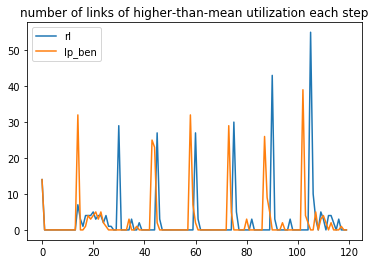

In [37]:
linkUtilMoreThanOneEachStep_rl=[]
for i in datas_rl[0].index :#and i < len(mean_maxUtil_ben):
    if i >= len(mean_maxUtil_ben):break
    linkUtilMoreThanOneEachStep_rl.append(sum(datas_rl[0].iloc[i,:]>=mean_maxUtil_ben.iloc[i,-1]))# max is 3-th col

linkUtilMoreThanOneEachStep_ben=[]
for i in datas_ben[0].index:# and i < len(mean_maxUtil_ben) :
    if i >= len(mean_maxUtil_ben):break
    linkUtilMoreThanOneEachStep_ben.append(sum(datas_ben[0].iloc[i,:]>=mean_maxUtil_ben.iloc[i,-1]))

linkUtilMoreThanOneEachStep_ospf=[]
for i in datas_ospf[0].index :#and i < len(mean_maxUtil_ben) :
    if i >= len(mean_maxUtil_ben):break
    linkUtilMoreThanOneEachStep_ben.append(sum(datas_ospf[0].iloc[i,:]>=mean_maxUtil_ben.iloc[i,-1]))    

# 画图
# minData_range = min(len(linkUtilMoreThanOneEachStep_rl),len(linkUtilMoreThanOneEachStep_ben),len(linkUtilMoreThanOneEachStep_ospf))
minData_range = min(len(linkUtilMoreThanOneEachStep_rl),len(linkUtilMoreThanOneEachStep_ben))#,len(linkUtilMoreThanOneEachStep_ospf))
# for datas in [ linkUtilMoreThanOneEachStep_rl,linkUtilMoreThanOneEachStep_ben,linkUtilMoreThanOneEachStep_ospf ]:
for datas in [ linkUtilMoreThanOneEachStep_rl,linkUtilMoreThanOneEachStep_ben ]:
    plt.plot(range(minData_range),datas[:minData_range])

plt.legend(["rl","lp_ben","ospf"])
plt.title("number of links of higher-than-mean utilization each step")

# cdf图绘制

In [2]:
import statsmodels.api as sm

In [ ]:
delay_rl_5_50 = np.loadtxt( "/home/hesy/projects/ns3_inter/Mars-Code-NOW/data/rl_10s_50ms/debug/flow_monitor.parseRes")
len(delay_rl_5_50)
np.mean(delay_rl_5_50)

data = delay_rl_5_50
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
# #绘制阶梯图
# plt.step(x, y)
datas.append({"x":x,"y":y})

ospf的delay

In [ ]:
delay_ospf= np.loadtxt( "/home/hesy/projects/ns3_RL_LP/Mars-Code-NOW/data/rl_deci1/debug/flow_monitor.parseRes")
len(delay_ospf)
np.mean(delay_ospf)
delay_ospf

data = delay_ospf
ecdf = sm.distributions.ECDF(data)
#等差数列，用于绘制X轴数据
x = np.linspace(min(data), max(data))
# x轴数据上值对应的累计密度概率
y = ecdf(x)
# #绘制阶梯图
# plt.step(x, y)
datas.append({"x":x,"y":y})

在同一张图中绘制cdf

In [ ]:
for data in datas:
    plt.step(data["x"],data["y"])
    
plt.legend(["rl_5ms","ospf"])
plt.xlabel("delay time(ms)")
plt.title("cdf of mean-delay of flows")

# *.tm文件读入处理

## 按照顺序读入目的地址中的所有tm文件

In [16]:
import os.path as osp
parDir ="/home/hesy/projects/ns3/ns3_inter/Mars-Code-NOW/data/rl_deci2/0.005000"
dirPath = osp.join(parDir, "trafficMatrix")
files = os.listdir(dirPath)   # return a list

from tqdm import tqdm
data_tm=[]
""" ========== this logic is for TM only ========== """
# for fileIndex in tqdm(range(len(files))):    # 不用glob通配符匹配的好处就是 文件读入是按照顺序的
for fileIndex in tqdm(range(10)):  # for test at first
    filePath = osp.join(dirPath, "tm."+str(fileIndex))
    tmData = pd.read_csv(filePath,header=None)
    # print(f"read in {filePath} and shape is f{tmData.shape}")
    tmData=tmData[tmData.index%2==1] 
    tmData = tmData.drop([23],axis=1)   # 多出来了一列
    npData = tmData.values.copy()  # 把一个tm里面的23*23转成529*1 
    npData = npData.reshape(1,-1)
    
    data_tm.append(npData)
#     print(npData.shape,end = '\t')

data_tm = np.array(data_tm).squeeze()    # shape ( tm_file_numbers , 506(23*22) )

<IPython.core.display.Javascript object>


  0%|          | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>

(1, 529)	

<IPython.core.display.Javascript object>


 90%|█████████ | 9/10 [00:00<00:00, 86.05it/s]

(1, 529)	

<IPython.core.display.Javascript object>

100%|██████████| 10/10 [00:00<00:00, 86.36it/s]

(1, 529)	

<IPython.core.display.Javascript object>

## 多线程读入 并 处理 非完整的 tm数据

In [ ]:
# 补全TM的数据，因为TM的每一行并不一定是完整的23个数据
def completeData( ip :pd.DataFrame,size:pd.DataFrame)->list: 
    ipdb.set_trace()
    # process each line
    res = [ [] for i in range(len(ip.index) ) ]
    for line in range(len(ip.index) ):
        first_router = int( ip.iloc[line,0].split('.')[2] )  
        last_router = first_router
#         for col_ip in range(1,23):
        for col in range(1,23):
#             ipdb.set_trace()
            if(len(res[line])==first_router-1): #  set 0 for size to itself
                res[line].append(0)
            if(len(res[line])==23):
                break
                
            ip_str = ip.iloc[line,col]

            if any([ ip_str ==x for x in [" ",'']]): 
                res[line].append(0) 
            else:
                # router to be dealt with
                cur_router = int( ip_str.split('.')[2])
                cur_size= int(size.iloc[line,col])   # origin is object type
#                 cur_router = int( ip_str.split('.')[2])
#                 cur_size= int(size.iloc[line,col_size])   # origin is object type
                if(col==1 and line>0):  # 只有第一行 全都是递增的router index
                    if(cur_router==2):
                        res[line].append(cur_size)
                        col_size+=1
                        last_router = 2
                        continue
                while(cur_router>last_router+1):
                    # 其中一种情况是 4...7 （first_router is 5） 介于两者之间
                    if(len(res)==first_router-1 ):
                        res[line].append(0) 
                        last_router+=1
                        continue
                    last_router+=1
                    res[line].append(0) 
                # 边界情况 到最后了
                res[line].append( cur_size )
                last_router = cur_router
#     return res # list of (23:22) node->node
    return np.array(res) # array of (23:22) node->node
                    
def processTM(tmDataFile:list)->list: 
    tm = pd.read_csv(tmDataFile,header=None,keep_default_na=False)
    ip = tm[tm.index%2==0] 
    size = tm[tm.index%2==1]
    ip.index = range(len(ip.index))
    size.index = range(len(ip.index))
                       
    return tmDataFile,completeData( ip,size ) # 第一个维度的第i个元素就是第i个TM

In [ ]:
import h5py

if not os.path.exists("tmData_after_process.h5"):
    print("create tmData_after_process.h5")
    global f,g1,g2
    f= h5py.File('tmData_after_process.h5','w') # {tmIndex:array of (23,22)}
    g1 = f.create_group("tmIndex")
    g2 = f.create_group("end_to_end")  # {fromNode-toNode-timeSequence}

In [ ]:
filename , res = processTM("/home/hesy/projects/ns3_RL_LP/Mars-Code-NOW/data/readFile_0.4/0.005000/trafficMatrix/tm.0")

In [ ]:
tm_after_process = {}
with futures.ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
    for future in executor.map(processTM,files[:10],chunksize=len(files)//os.cpu_count() ):
        tm_after_process[int( future[0].split('.')[-1] )] = future[1]  #  e. 
#         g1[ futures[0].split('.')[-1] ] =future[1]

pprint(tm_after_process.keys())
# pprint(tm_after_process)

In [ ]:
"""
# 测试文件写成功
f.close()
with h5py.File('tmData_after_process.h5','r') as f:
#     print(f["1"])
    print(f['tmIndex']["1"])
"""

# 拓扑图可视化绘制

Geant

<IPython.core.display.Javascript object>

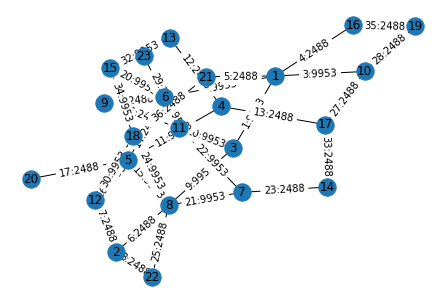

In [4]:
import networkx as nx
G = nx.Graph()

for node in range(1,23+1):
    G.add_node( str(node) ,desc=str(node) )

G.add_edge(str(1),str(3), name='1:9953' )
G.add_edge(str(1),str(6), name='2:9953' )
G.add_edge(str(1),str(10), name='3:9953' )
G.add_edge(str(1),str(16), name='4:2488' )
G.add_edge(str(1),str(21), name='5:2488' )
G.add_edge(str(2),str(8), name='6:2488' )
G.add_edge(str(2),str(12), name='7:2488' )
G.add_edge(str(2),str(22), name='8:2488' )
G.add_edge(str(3),str(8), name='9:9953' )
G.add_edge(str(3),str(11), name='10:9953' )
G.add_edge(str(4),str(5), name='11:9953' )
G.add_edge(str(4),str(13), name='12:2488' )
G.add_edge(str(4),str(17), name='13:2488' )
G.add_edge(str(5),str(6), name='14:2488' )
G.add_edge(str(5),str(8), name='15:9953' )
G.add_edge(str(5),str(12), name='16:9953' )
G.add_edge(str(5),str(20), name='17:2488' )
G.add_edge(str(6),str(9), name='18:2488' )
G.add_edge(str(6),str(11), name='19:9953' )
G.add_edge(str(6),str(15), name='20:9953' )
G.add_edge(str(7),str(8), name='21:9953' )
G.add_edge(str(7),str(11), name='22:9953' )
G.add_edge(str(7),str(14), name='23:2488' )
G.add_edge(str(8),str(18), name='24:9953' )
G.add_edge(str(8),str(22), name='25:2488' )
G.add_edge(str(9),str(11), name='26:2488' )
G.add_edge(str(10),str(17), name='27:2488' )
G.add_edge(str(10),str(19), name='28:2488' )
G.add_edge(str(11),str(23), name='29:3488' )
G.add_edge(str(12),str(18), name='30:9953' )
G.add_edge(str(13),str(23), name='31:2488' )
G.add_edge(str(13),str(15), name='32:9953' )
G.add_edge(str(14),str(17), name='33:2488' )
G.add_edge(str(15),str(18), name='34:9953' )
G.add_edge(str(16),str(19), name='35:2488' )
G.add_edge(str(18),str(21), name='36:2488' )

# draw graph with labels
pos = nx.spring_layout(G)
nx.draw(G, pos)
node_labels = nx.get_node_attributes(G, 'desc')
nx.draw_networkx_labels(G, pos, labels=node_labels)
edge_labels = nx.get_edge_attributes(G, 'name')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# plt.savefig('topo', format='svg')